In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [176]:
# read data
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [177]:
print('Entrees duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrees duplicates: 5268



2. Exploring the content of variables
This dataframe contains 8 variables that correspond to:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

The dataframe contains  ∼ 400,000 entries. What are the number of users and products in these entries ?

In [178]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


In [179]:
# drop the NA rows
df = df.dropna()
df.head(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1019,536522,47599B,BLUE PARTY BAGS,1,12/1/2010 12:49,2.10,15012.0,United Kingdom
1020,536522,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,12/1/2010 12:49,3.75,15012.0,United Kingdom
1021,536522,20972,PINK CREAM FELT CRAFT TRINKET BOX,1,12/1/2010 12:49,1.25,15012.0,United Kingdom
1022,536522,22569,FELTCRAFT CUSHION BUTTERFLY,1,12/1/2010 12:49,3.75,15012.0,United Kingdom


In [180]:
world_map = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
world_map = world_map.reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',locations = countries.index,locationmode = 'country names',
            z = countries,text = countries.index, colorbar = {'title':'Orders'},
            colorscale='Plasma',reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
              geo = dict(resolution=50,showocean=True, oceancolor="LightBlue",
                         showland=True, landcolor="Gray",showframe = True),
             template = 'plotly_white')

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

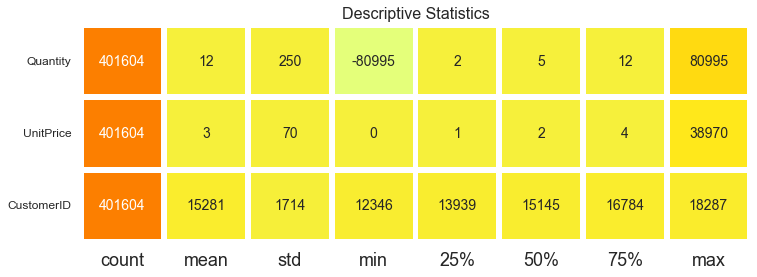

In [181]:
desc = df.describe().T
df1 = pd.DataFrame(index= [col for col in df.columns if df[col].dtype != 'O'], 
                   columns= ["count","mean","std","min","25%","50%","75%","max"],
                   data= desc )

f,ax = plt.subplots(figsize=(12,4))

sns.heatmap(df1, annot=True,cmap = "Wistia", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 14})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.title("Descriptive Statistics", size = 16)
plt.show()

## To do:

Add a order_canceled column, with value 1 indicate order canceled, otherwise set the value to 0 (canceled order: start with letter C in InvoiceNo)

根据condition 赋值，创建一个新列

In [182]:
df['Order_canceled'] = df.InvoiceNo.apply(lambda x: 1 if 'C' in x else 0)

In [183]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0


In [184]:
df['Order_canceled'].unique()

array([0, 1], dtype=int64)

In [185]:
display(df[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [186]:
df[df.Order_canceled == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,1


In [187]:
df['Order_canceled'].sum()

8872

In [188]:
# have a look at the canceled order
df[df.Order_canceled == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,1


In [189]:
n1 = df['Order_canceled'].sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 8872/401604 (2.21%) 


In [190]:
# only included not canceled order
df = df[df.Order_canceled != 1]

In [191]:
df.shape

(392732, 9)

The InvoiceNo and StockCode columns are irrelevant. We can remove them:

In [192]:
df.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)
df.head()

C:\Users\18202\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


## To do

Next, we’ll be vectorizing the Description column to cluster products into groups. To prepare the data for this, we’ll need to make the words lowercase and remove any punctuation, for example in row 4 with “RED WOOLY HOTTIE WHITE HEART.”

Let’s make a function that cleans the description. It uses regular expressions to remove punctuation and lower capital letters.

In [193]:
# import re
# re.Replace(df['Description'],"\~#%&*{}/:<>?|-", " ")

In [194]:
# write your code below
import re
df['Description'] = df.Description.str.lower()

C:\Users\18202\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
df['Description']

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904            pack of 20 spaceboy napkins
541905           children's apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: Description, Length: 392732, dtype: object

In [196]:
df['Description'] = df['Description'].str.replace(r'[^\w\s]+', '')

C:\Users\18202\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
df['Description']

0           white hanging heart tlight holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904            pack of 20 spaceboy napkins
541905            childrens apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: Description, Length: 392732, dtype: object

In [198]:
# 定义一个函数 clean
# import re
# def clean(Description):
#    return re.sub(r'[^\w\s]', '', Description).lower()
    
# df['Description'] = df['Description'].apply(clean)

In [199]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [200]:
df = df.reset_index().drop('index',axis=1)

In [201]:
# define a new column Total which is UnitPrice times Quantity
# write your code below
df['Total'] = df['UnitPrice'] * df['Quantity']

In [202]:
df['Total']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
392727    10.20
392728    12.60
392729    16.60
392730    16.60
392731    14.85
Name: Total, Length: 392732, dtype: float64

In [203]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled,Total
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34


## Step 2: Vectorize the Description

## To do

Define a CountVectorizer and apply transformation to Description column, put the result to a variable called descriptions.

In [204]:
from sklearn.feature_extraction.text import CountVectorizer

In [252]:
# write your code below
cv = CountVectorizer()                       #创建词袋数据结构
cv_fit=cv.fit_transform(df['Description'])   #标准化                        

cv.get_feature_names()                       
列表形式呈现文章生成的词典，也可以 print(cv.get_feature_names)

cv.vocabulary_     #字典形式呈现，key:词， value:词频  也可以 print(cv.vocabulary_)

In [207]:
cv_fit    #第0个列表元素， **词典中索引为3的元素**，词频    也可以   print(cv_fit)

<392732x2145 sparse matrix of type '<class 'numpy.int64'>'
	with 1673342 stored elements in Compressed Sparse Row format>

In [208]:
cv_fit.toarray()  #      .toarray()是将结果转化为稀疏矩阵矩阵的表示方式   也可以 print(cv_fit.toarray())  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

cv_fit.toarray().sum(axis=0)     #每个词在所有文档中的词频   print(cv_fit.toarray().sum(axis=0))

As expected, the matrix is mostly sparse and quite large. NumPy has clever tricks to keep these arrays in compressed format so operating time is faster.

## Step 3: Cluster the Products & Create Features


## To do

Apply KMeans to descriptions, set the clusters to 5 (or any other numbers you want)

In [209]:
from sklearn.cluster import KMeans

In [210]:
kmeans = KMeans(n_clusters=5)   
kmeans.fit(cv_fit)                

KMeans(n_clusters=5)

n_clusters is product group

cv_fit=cv.fit_transform(df['Description'])    

In [211]:
df['Product'] = kmeans.labels_
df.head()                         # append the labels to a new column called Product

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled,Total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30,4
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,1
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00,2
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,2
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,4


In [212]:
customers = pd.DataFrame({'CustomerID':df['CustomerID'].unique()})
customers.head()                 # create a customer dataframe with customer id as primary key

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [213]:
customers['Product0'] = 0
customers['Product1'] = 0
customers['Product2'] = 0
customers['Product3'] = 0
customers['Product4'] = 0
customers.head()            # add the product labels to new columns (add more if you set the number of 
                            # clusters more than 5 in previous step)

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [214]:
# fill the data frame with the total price they spend
from tqdm import tqdm
for index in tqdm(range(len(df))):
    customerID = df.loc[index,'CustomerID']
    product_category = df.loc[index,'Product']
    product_price = df.loc[index,'Total']
    customers_table_index = customers[customers['CustomerID']==customerID].index[0]
    customers.loc[customers_table_index, 'Product'+str(product_category)] += product_price

#更灵活，相当于做了一个loop, transformation 都可以   这里用pivot table

100%|████████████████████████████████████████████████████████████████████████| 392732/392732 [03:12<00:00, 2042.68it/s]


In [215]:
customers

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,506.70,413.58,3802.47,0.00,668.46
1,13047.0,25.35,39.84,2372.48,625.91,173.96
2,12583.0,1410.44,0.00,5593.56,277.38,0.00
3,13748.0,0.00,0.00,829.77,84.18,34.30
4,15100.0,0.00,0.00,876.00,0.00,0.00
...,...,...,...,...,...,...
4334,13436.0,33.95,0.00,139.04,23.90,0.00
4335,15520.0,0.00,290.10,53.40,0.00,0.00
4336,13298.0,0.00,0.00,360.00,0.00,0.00
4337,14569.0,1.65,0.00,201.94,13.85,9.95


## Step 4 | Creating Purchase History Descriptions


In [216]:
customers['PurchaseCount'] = 0
customers['PurchaseMin'] = 0
customers['PurchaseMax'] = 0
customers['PurchaseMean'] = 0
customers['PurchaseSum'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,506.70,413.58,3802.47,0.00,668.46,0,0,0,0,0
1,13047.0,25.35,39.84,2372.48,625.91,173.96,0,0,0,0,0
2,12583.0,1410.44,0.00,5593.56,277.38,0.00,0,0,0,0,0
3,13748.0,0.00,0.00,829.77,84.18,34.30,0,0,0,0,0
4,15100.0,0.00,0.00,876.00,0.00,0.00,0,0,0,0,0


## To do

In [217]:
# similar to above calculations, fill in the value for the new columns
from tqdm import tqdm
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    history = df[df['CustomerID']==customerID]['Total']
    customers.loc[index,'PurchaseCount'] = history.count()
    customers.loc[index,'PurchaseMin'] = history.min()
    customers.loc[index,'PurchaseMax'] = history.max()
    customers.loc[index,'PurchaseMean'] = history.mean()
    customers.loc[index,'PurchaseSum'] = history.sum()
    
#也可以尝试用 groupby 去做

100%|█████████████████████████████████████████████████████████████████████████████| 4339/4339 [00:10<00:00, 425.51it/s]


In [218]:
customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,506.70,413.58,3802.47,0.00,668.46,297,6.36,107.25,18.152222,5391.21
1,13047.0,25.35,39.84,2372.48,625.91,173.96,172,4.95,68.00,18.822907,3237.54
2,12583.0,1410.44,0.00,5593.56,277.38,0.00,247,6.80,132.80,29.479271,7281.38
3,13748.0,0.00,0.00,829.77,84.18,34.30,28,9.36,204.00,33.866071,948.25
4,15100.0,0.00,0.00,876.00,0.00,0.00,3,175.20,350.40,292.000000,876.00
...,...,...,...,...,...,...,...,...,...,...,...
4334,13436.0,33.95,0.00,139.04,23.90,0.00,12,10.20,25.50,16.407500,196.89
4335,15520.0,0.00,290.10,53.40,0.00,0.00,18,9.48,34.68,19.083333,343.50
4336,13298.0,0.00,0.00,360.00,0.00,0.00,2,90.00,270.00,180.000000,360.00
4337,14569.0,1.65,0.00,201.94,13.85,9.95,12,1.65,122.40,18.949167,227.39


OR

import numpy as np

customers['PurchaseCount'] = df.groupby('CustomerID')['Total'].count()

customers['PurchaseMin'] = df.groupby('CustomerID')['Total'].min()

customers['PurchaseMax'] = df.groupby('CustomerID')['Total'].max()

customers['PurchaseMean'] = df.groupby('CustomerID')['Total'].mean()

customers['PurchaseSum'] = pd.pivot_table(df,index=['CustomerID'],values=['Total'],aggfunc=[np.sum])

customers

groupby('CustomerID'), 分别找出min,max, 做出一个 two column 的dataframe。 一个是customerid, 一个是purchasemin

## Step 5 | Creating a binary ‘foreign’ feature

In [219]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled,Total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30,4
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,1
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00,2
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,2
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,4
...,...,...,...,...,...,...,...,...,...
392727,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France,0,10.20,3
392728,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France,0,12.60,2
392729,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France,0,16.60,2
392730,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France,0,16.60,2


In [220]:
# add a new column called Foreign
customers['Foreign'] = 0

## To do

In [221]:
# set foreign to 1 if the customer do not reside in United Kingdom
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    customerCountry = df[df['CustomerID']==customerID] .reset_index().loc[0,'Country']
    if customerCountry == 'United Kingdom':
        customers.loc[index,'Foreign'] = 1

100%|█████████████████████████████████████████████████████████████████████████████| 4339/4339 [00:07<00:00, 582.91it/s]


customers['Foreign'] = df[df['Country'] != 'United Kingdom'] =1

In [222]:
customers   

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,17850.0,506.70,413.58,3802.47,0.00,668.46,297,6.36,107.25,18.152222,5391.21,1
1,13047.0,25.35,39.84,2372.48,625.91,173.96,172,4.95,68.00,18.822907,3237.54,1
2,12583.0,1410.44,0.00,5593.56,277.38,0.00,247,6.80,132.80,29.479271,7281.38,0
3,13748.0,0.00,0.00,829.77,84.18,34.30,28,9.36,204.00,33.866071,948.25,1
4,15100.0,0.00,0.00,876.00,0.00,0.00,3,175.20,350.40,292.000000,876.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,13436.0,33.95,0.00,139.04,23.90,0.00,12,10.20,25.50,16.407500,196.89,1
4335,15520.0,0.00,290.10,53.40,0.00,0.00,18,9.48,34.68,19.083333,343.50,1
4336,13298.0,0.00,0.00,360.00,0.00,0.00,2,90.00,270.00,180.000000,360.00,1
4337,14569.0,1.65,0.00,201.94,13.85,9.95,12,1.65,122.40,18.949167,227.39,1


In [223]:
customers.Foreign.shape

(4339,)

## Step 6 | Creating Clusters

## To do

Kmean clustering on customers dataframe, please use both silhouette_score and Elbow Method to determine the best number of clusters.

和之前 k-means customer example 做法是一样的

In [224]:
from sklearn.preprocessing import StandardScaler   

In [225]:
scaler = StandardScaler()

In [226]:
scaled_customers = scaler.fit_transform(customers)

In [227]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)

In [228]:
scaled_customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,1.481138,0.105353,0.599017,0.395083,-0.186295,0.464097,0.915732,-0.021640,-0.028120,-0.034194,0.372138,0.326505
1,-1.308560,-0.165604,-0.058720,0.164259,0.588443,0.021369,0.361382,-0.022840,-0.041697,-0.033737,0.132394,0.326505
2,-1.578063,0.614078,-0.128834,0.684194,0.157040,-0.134379,0.693992,-0.021266,-0.019281,-0.026476,0.582549,-3.062741
3,-0.901402,-0.179874,-0.128834,-0.084759,-0.082099,-0.103670,-0.277229,-0.019089,0.005348,-0.023487,-0.122447,0.326505
4,-0.116128,-0.179874,-0.128834,-0.077297,-0.186295,-0.134379,-0.388099,0.121970,0.055992,0.152405,-0.130490,0.326505
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,-1.082620,-0.160763,-0.128834,-0.196254,-0.156712,-0.134379,-0.348185,-0.018374,-0.056399,-0.035383,-0.206087,0.326505
4335,0.127818,-0.179874,0.381707,-0.210078,-0.186295,-0.134379,-0.321577,-0.018986,-0.053223,-0.033560,-0.189767,0.326505
4336,-1.162773,-0.179874,-0.128834,-0.160588,-0.186295,-0.134379,-0.392533,0.049501,0.028179,0.076088,-0.187930,0.326505
4337,-0.424546,-0.178945,-0.128834,-0.186101,-0.169152,-0.125470,-0.348185,-0.025646,-0.022879,-0.033651,-0.202692,0.326505


In [229]:
features = ['Product0', 'Product1', 'Product2', 'Product3','Product4', 'PurchaseCount', 
            'PurchaseMin', 'PurchaseMax', 'PurchaseMean', 'PurchaseSum', 'Foreign']

需要把所有feature都写上。Product0 1 2 3 4 是你在每个product上花了多少钱，买了多少东西。

这些都是代表customer本身的一些特征。从Product 0 到Foreign, 用这些特征对customer 进行segmentation。

In [230]:
x = customers.loc[:, features].values

In [231]:
y = customers.loc[:, ['PurchaseSum']].values

In [232]:
x = StandardScaler().fit_transform(x)

In [233]:
x

array([[ 0.10535273,  0.59901735,  0.3950832 , ..., -0.03419415,
         0.37213791,  0.32650491],
       [-0.16560446, -0.05872042,  0.16425943, ..., -0.03373715,
         0.13239406,  0.32650491],
       [ 0.61407787, -0.12883406,  0.68419442, ..., -0.02647595,
         0.58254926, -3.06274106],
       ...,
       [-0.17987425, -0.12883406, -0.16058774, ...,  0.07608825,
        -0.18793008,  0.32650491],
       [-0.17894545, -0.12883406, -0.18610121, ..., -0.03365112,
        -0.20269206,  0.32650491],
       [-0.12189442, -0.12883406, -0.12209156, ..., -0.03134725,
        -0.13354531, -3.06274106]])

In [234]:
y = StandardScaler().fit_transform(y)

In [235]:
y

array([[ 0.37213791],
       [ 0.13239406],
       [ 0.58254926],
       ...,
       [-0.18793008],
       [-0.20269206],
       [-0.13354531]])

## Elbow Method

In [236]:
from sklearn.cluster import KMeans
k_inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    k_inertia.append(kmeans.inertia_)

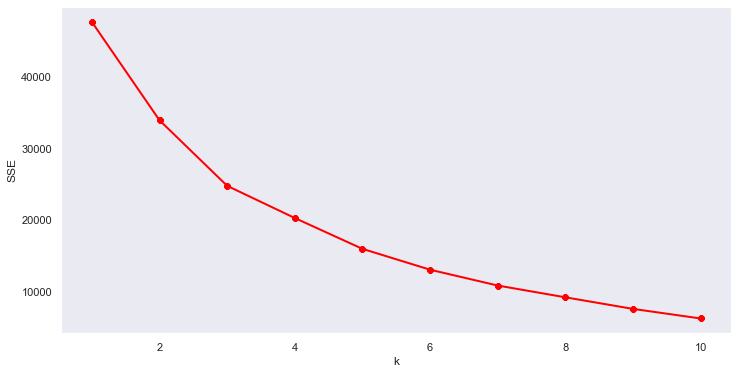

In [237]:
plt.figure(figsize=(12,6))

plt.grid()

plt.plot(range(1,11),k_inertia, linewidth=2, color = "red", marker = "8")

plt.xlabel('k')

plt.ylabel('SSE')

plt.show()

# Elbow Method

### Silhouette_Score Analysis
选择clustering 最优值, kmeans最优k值的确定方法-手肘法和轮廓系数法

平均轮廓系数(silhouette_score)最大的k便是最佳聚类数

Silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.

Calculate Silhouette score for K-Means clusters with n_clusters = N

Perform comparative analysis to determine the best value of K using the Silhouette plot

The best k value defined by the Silhouette Coefficient Method may not be the best choice. We still need to consider 
the SSE value. If there is no special situation, the Elbow Method is the first method to use.

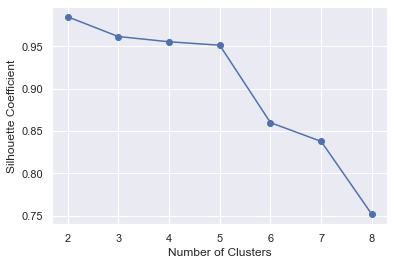

In [238]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
 
df_features = customers
Scores = []  
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(df_features[['Product0','Product1','Product2','Product3','Product4', 
                              'PurchaseCount','PurchaseMin','PurchaseMax','PurchaseMean',
                              'PurchaseSum', 'Foreign']])
    Scores.append(silhouette_score(df_features[['Product0','Product1','Product2','Product3','Product4',
                                               'PurchaseCount','PurchaseMin','PurchaseMax','PurchaseMean',
                                               'PurchaseSum', 'Foreign']],
                                   estimator.labels_,metric='euclidean'))
X = range(2,9)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(X,Scores,'o-')
plt.show()

PCA Analysis
Draw the principal component scattered point diagram to evaluate the quality of the clustering effect

In [239]:
from sklearn.decomposition import PCA
pca_customers = PCA(n_components = 2)    
principalComponents_customers = pca_customers.fit_transform(df_features.iloc[:,0:11])  

plt.scatter(result[:,0],result[:,1],c=estimator.labels_, edgecolor='k')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

breast_dataset.iloc[:,range(30)] = scaler.fit_transform(breast_dataset.iloc[:,range(30)])

from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)

principalComponents_breast = pca_breast.fit_transform(breast_dataset.iloc[:,range(30)])

In [240]:
principal_customers_DF = pd.DataFrame(data = principalComponents_customers, columns = ['principal component 1', 'principal component 2'])

In [241]:
principal_customers_DF.tail()

,principal component 1,principal component 2
4334,-2241.960068,131.460364
4335,-2171.038137,82.956716
4336,-1954.044191,423.126549
4337,-2176.730131,219.957906
4338,-1437.555937,81.564594


In [242]:
print('Explained variation per principal component: {}'.format(pca_customers.explained_variance_ratio_))

Explained variation per principal component: [0.87346984 0.07055038]


import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="principal component 1", y="principal component 2", hue = finalDF['Foreign'],
            data=finalDF)

In [243]:
fig = plt.figure(figsize = (8,8))

<Figure size 576x576 with 0 Axes>

In [244]:
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

Text(0.5, 1.0, '2 component PCA')

### Build model with cluster = 4

In [245]:
kmeans = KMeans(n_clusters=4)

In [246]:
label = kmeans.fit_predict(x)
print(label)

[0 0 0 ... 0 0 0]


In [247]:
print(kmeans.cluster_centers_)

[[-4.39526698e-02 -3.30812184e-02 -4.91786801e-02 -3.75448846e-02
  -3.44444470e-02 -3.52902406e-02 -1.50984283e-02 -2.25601050e-02
  -2.13006485e-02 -5.23591054e-02  1.62697051e-03]
 [ 9.73631631e+00  5.26029334e+00  6.73530367e+00  6.21793098e+00
   3.35791302e+00  9.45213007e+00 -2.09529905e-02  4.84231475e-01
   3.17149268e-02  7.87977502e+00 -3.51344281e-01]
 [ 1.47155283e+01  2.14103501e+01  2.40525494e+01  2.30866604e+01
   3.28885429e+01  3.80722167e+00 -2.41862880e-02  1.77563607e+00
   2.52277134e-01  2.70174106e+01 -8.03243744e-01]
 [-1.79874250e-01 -1.28834059e-01  1.96077581e+01 -1.86294759e-01
  -1.34378788e-01 -3.92533411e-01  3.27984828e+01  4.24233566e+01
   4.53824727e+01  1.34450596e+01  3.26504912e-01]]


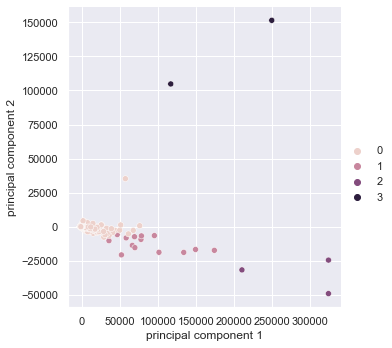

In [248]:
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="principal component 1", y="principal component 2", hue=label, data=principal_customers_DF)

## Step 7 | Analysis

## To do:

Analyze the clusters you just created, can you find any interesting insight from the cluster?

Use heatmap to evaluate the quality of the clustering effect

In [249]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(scaled_customers)

In [250]:
scaled_customers['Cluster'] = model.fit_predict(scaled_customers)

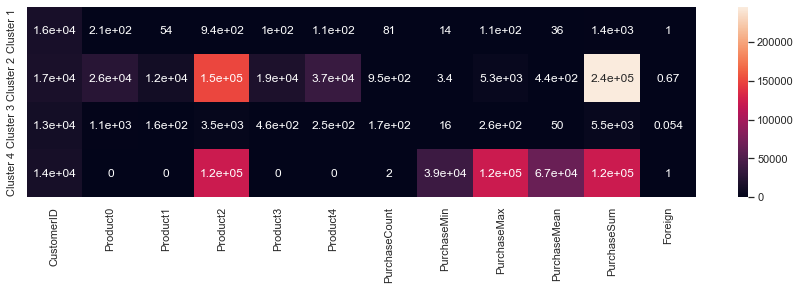

In [251]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)[:,0:12], annot=True,
            yticklabels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'], xticklabels=scaled_customers.columns[0:12])

We can take away the following analyses — out of the three clusters, most buy around 88 times. A second cluster buys less — about 4 times, and the third cluster buys a lot, with 5.9 * 10³ = 5900 times. 

From a business standpoint, this seems to be an outlier and is probably a smaller demographic.
The second cluster has a very low minimum purchase, meaning that the second cluster returns expensive items, but also buys expensive items, as demonstrated by the high value in PurchaseMax. From PurchaseMean, we can also tell that they seem to buy, on average, the most. However, while the second customer segment buys expensive items, they don’t buy the most.

The third cluster purchases the most in total. From their cluster attributes, we can see that this cluster has the lowest average purchase value — meaning that the items this customer segment buys many times (a large purchase count) but each time with products that aren’t very expensive. 

This third cluster also seems to buy a lot across the 5 product groups. By looking into the most prominent vocabulary in each of the 5 product groups, we can get a feel for which customer segments buy more in which areas.

Product category 4 seems to have the most purchases across all clusters. This product category could be emphasized on the ecommerce platform, or, if the business leaders want, de-emphasized so that other categories like have less purchases.
This is a rich vein for more analysis, but here are a few things that we can conclude from what we’ve done so far.

·       There are three primary customer segments.

·       Customer segment 1 purchases relatively evenly among all 5 categories, but buys extensively from product category 4. This customer segment purchases an average of 90 times and returns at most $20 worth of products.  

The average purchase in customer segment 1 is about $30. This cluster is primarily local, but there are some foreign customers in this segment.

·       Customer segment 2 purchases little among product categories 1, 2, and 5. This segment returns heavily in product category 3, so a smart business decision would be to try and eliminate as many category 3 products from segment 2’s view. This customer segment also buys heavily from category 4. This segment purchases little — only about 4 times — and buys and returns very expensive objects. However, average purchases are the highest out of the three clusters and the purchase sum is higher than the second customer segment’s. This segment is purely composed of UK customers.

·       Customer segment 3 purchases a lot among all five categories, buying, like the other two customer segments, extensively from the fourth category. This category buys a lot, and like the second customer segment, buys and returns expensive items. It may be wise to obscure expensive items from their view, then, since they very well may return it. While this customer segment buys products of low price, they are bought in such high volume that this customer segment contributes most to profit. This customer segment has the highest percent of foreign customers.